In [61]:
import json
import pennylane as qml
import pennylane.numpy as np

def circuit_left():
    """
    This function corresponds to the circuit on the left-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT([0,1])

    #qml.Barrier([0,1,2])
    qml.SWAP([1,2])
    qml.CNOT([0,1])
    qml.SWAP([1,2])
    #qml.Barrier([0,1,2])

def circuit_right():
    """
    This function corresponds to the circuit on the right-hand side of the diagram in the 
    description. Simply place the necessary operations, you do not have to return anything.
    """
    #qml.Barrier([0,1,2])
    qml.CNOT([0,1])

    #qml.Barrier([0,1,2])
    qml.SWAP([1,2])
    qml.CNOT([0,1])
    qml.SWAP([1,2])
    #qml.Barrier([0,1,2])

    #qml.Toffoli([2,1,0])
    qml.ctrl(qml.SX(0), control=1)
    qml.CNOT([2,1])
    qml.ctrl(qml.adjoint(qml.SX(0)), control=1)
    qml.CNOT([2,1])
    qml.SWAP([1,2])
    qml.ctrl(qml.SX(0), control=1)
    qml.SWAP([1,2])

    #qml.Barrier([0,1,2])
    qml.SWAP([0,1])
    qml.SWAP([1,2])

def U():
    """This operator generates a PauliX gate on a random qubit"""
    qml.PauliX(wires=np.random.randint(3))


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(alpha, beta, gamma):
    """Total circuit joining each block.

    Args: 
        alpha (float): The first parameter of a U3 gate.
        beta (float):The second parameter of a U3 gate. 
        gamma (float): The third parameter of a U3 gate. 
    
    Returns:
        (float): The expectation value of an observable.
    """
    qml.U3(alpha, beta, gamma, wires=0)
    circuit_left()
    U()
    circuit_right()

    # Here we are returning the expected value with respect to any observable,
    # the choice of observable is not important in this exercise.

    return qml.expval(0.5 * qml.PauliZ(2) - qml.PauliY(2))


# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(*angles)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    assert np.allclose(
        solution_output, expected_output, atol=2e-1
    ), "The expected output is not quite right."

    ops = circuit.tape.operations

    for op in ops:
        assert not (0 in op.wires and 2 in op.wires), "Invalid connection between qubits."

    assert circuit.tape.observables[0].wires == qml.wires.Wires(2), "Measurement on wrong qubit."


test_cases = [['[2.0,1.0,3.0]', '-0.97322'], ['[-0.5,1.2,-1.2]', '0.88563'], ['[0.22,3.0,2.1]', '0.457152'], ['[2.22,3.1,-3.3]', '-0.335397'], ['[-0.2,-0.1,3.4]', '0.470199'], ['[-1.2,-1.1,0.4]', '-0.6494612']]

for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2.0,1.0,3.0]'...
Correct!
Running test case 1 with input '[-0.5,1.2,-1.2]'...
Correct!
Running test case 2 with input '[0.22,3.0,2.1]'...
Correct!
Running test case 3 with input '[2.22,3.1,-3.3]'...
Correct!
Running test case 4 with input '[-0.2,-0.1,3.4]'...
Correct!
Running test case 5 with input '[-1.2,-1.1,0.4]'...
Correct!


-----
# <center> Tests

In [57]:
def draw_circuit_nice(function, test_cases):
    import matplotlib.pyplot as plt
    #test_cases = [['[[0, 1], 0, 3]', '[-1.0,  1.0,  1.0,  1.0, -1.0, -1.0,  1.0,  1.0,  1.0]']]
    #state, error_key, qubit = json.loads(test_cases[0][0])
    qml.drawer.use_style("black_white")
    fig, ax = qml.draw_mpl(function)(*json.loads(test_cases[0][0]))
    plt.show()

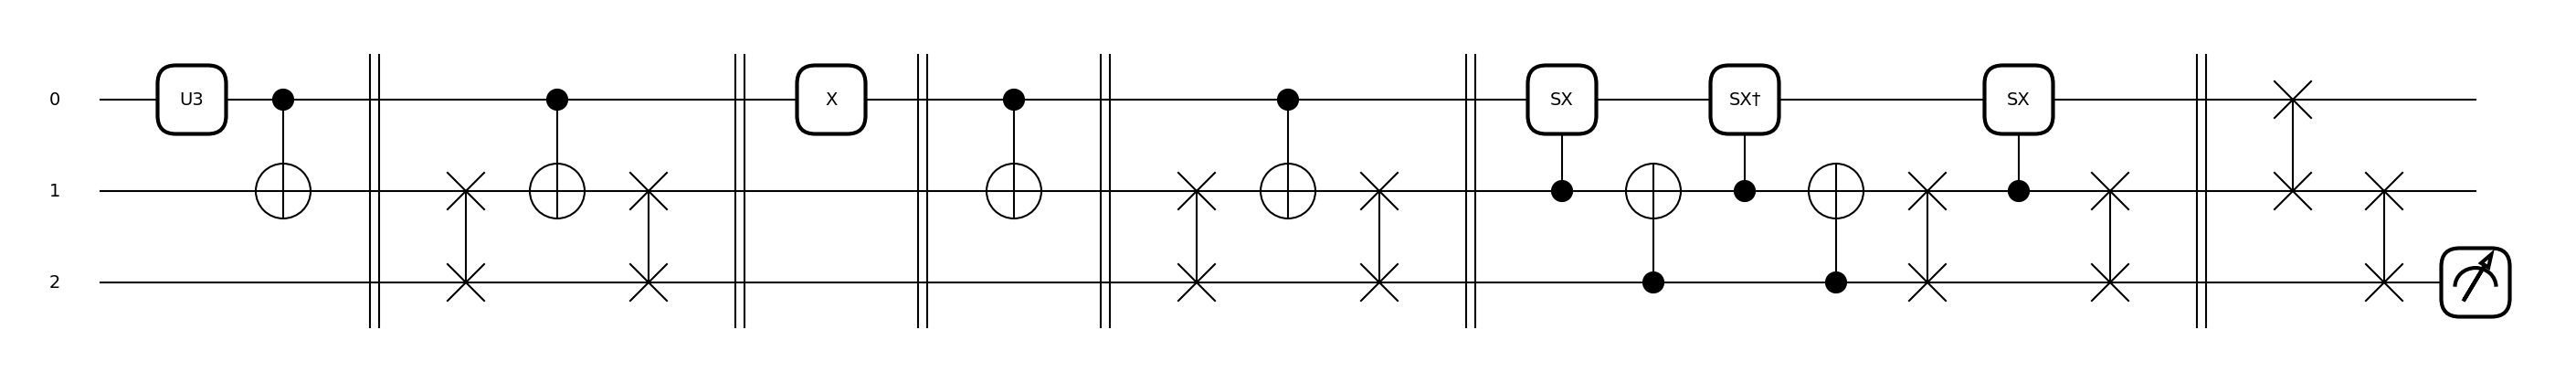

In [58]:
draw_circuit_nice(circuit,test_cases)

In [59]:
circuit(*json.loads(test_cases[0][0]))

tensor(-0.97322082, requires_grad=True)

In [60]:
json.loads(test_cases[0][0])

[2.0, 1.0, 3.0]

In [21]:
test_cases[0]

['[2.0,1.0,3.0]', '-0.97322']

In [ ]:
https://quantumcomputing.stackexchange.com/questions/3943/how-do-you-implement-the-toffoli-gate-using-only-single-qubit-and-cnot-gates

In [ ]:
https://en.wikipedia.org/wiki/Quantum_error_correction

https://docs.pennylane.ai/en/stable/code/api/pennylane.ctrl.html